## Load packages

In [5]:
import pandas as pd
import numpy as np
import random
import re
import os
import matplotlib.pyplot as plt

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

## Load and inspect Data

In [6]:
sentencing_df = pd.read_csv("../Data/sentencing_data_withZ.csv", low_memory = False)

In [7]:
sentencing_df.head()
sentencing_df.info()
sentencing_df.shape

,Unnamed: 0,CASE_ID,CASE_PARTICIPANT_ID,RECEIVED_DATE,OFFENSE_CATEGORY,PRIMARY_CHARGE_FLAG,CHARGE_ID,CHARGE_VERSION_ID,DISPOSITION_CHARGED_OFFENSE_TITLE,CHARGE_COUNT,...,is_white_derived,is_other_derived,is_male_derived,age_derived,sentenceymd_derived,sentenceym_derived,judgeid_derived,sentence_length,sentence_length_zscore,judges_total_cases
0,0,149765331439,175691153649,8/15/1984 12:00:00 AM,PROMIS Conversion,True,50510062193,112898098217,FIRST DEGREE MURDER,1,...,False,False,True,27.0,2014-10-16,2014-10-01,judge_40,62.0,-0.014996,769
1,1,163734000970,119572148070,5/27/2002 12:00:00 AM,PROMIS Conversion,True,60663908958,740041557966,POSSESSION OF A CONTROLLED SUBSTANCE,1,...,False,False,True,26.0,2015-11-09,2015-11-01,judge_40,1.0,-0.258566,769
2,2,182050890480,179762088011,8/23/2004 12:00:00 AM,PROMIS Conversion,True,69728430461,658529032588,AGGRAVATED BATTERY,1,...,False,False,True,35.0,2012-02-08,2012-02-01,judge_40,10.0,2.181622,769
3,3,188763617530,185554465998,8/9/2005 12:00:00 AM,PROMIS Conversion,True,77575875953,740046322415,VIOLATION OF BAIL BOND,1,...,False,False,True,NaN,2015-11-09,2015-11-01,judge_40,2.0,-0.439882,769
4,4,195256796846,190097450194,2/21/2005 12:00:00 AM,PROMIS Conversion,True,84905279838,212776826308,ATTEMPT FIRST DEGREE MURDER,1,...,False,False,True,54.0,2012-04-05,2012-04-01,judge_40,40.0,1.460349,769


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 73222 entries, 0 to 73221
Data columns (total 56 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Unnamed: 0                         73222 non-null  int64  
 1   CASE_ID                            73222 non-null  int64  
 2   CASE_PARTICIPANT_ID                73222 non-null  int64  
 3   RECEIVED_DATE                      73222 non-null  object 
 4   OFFENSE_CATEGORY                   73222 non-null  object 
 5   PRIMARY_CHARGE_FLAG                73222 non-null  bool   
 6   CHARGE_ID                          73222 non-null  int64  
 7   CHARGE_VERSION_ID                  73222 non-null  int64  
 8   DISPOSITION_CHARGED_OFFENSE_TITLE  73222 non-null  object 
 9   CHARGE_COUNT                       73222 non-null  int64  
 10  DISPOSITION_DATE                   73222 non-null  object 
 11  DISPOSITION_CHARGED_CHAPTER        73222 non-null  obj

(73222, 56)

# Investigate factors that may affect sentence severity

## Investigate Race

In [ ]:

judges = sentencing_df.groupby("SENTENCE_JUDGE")["sentence_length_zscore"].apply(np.mean).sort_values(ascending = False)

## list of top 50% and bottom 50% judges in terms of sentencing severity

max_judges = judges[:123].index

min_judges = judges[124:].index

max_subset = sentencing_df[sentencing_df["SENTENCE_JUDGE"].isin(max_judges)]

min_subset = sentencing_df[sentencing_df["SENTENCE_JUDGE"].isin(min_judges)]


min_subset.columns

In [9]:
max_subset["is_white_derived"].value_counts()
min_subset["is_white_derived"].value_counts()

## number of cases 
max_subset["CASE_ID"].nunique()
min_subset["CASE_ID"].nunique()

False    51334
True      6430
Name: is_white_derived, dtype: int64

False    11902
True      2231
Name: is_white_derived, dtype: int64

57764

14133

In [10]:
## Race 
sentencing_df.groupby(["is_white_derived", "simplified_offense_derived"])["sentence_length_zscore"].apply(np.mean)
sentencing_df.groupby(["is_white_derived", "simplified_offense_derived"])["sentence_length_zscore"].apply(np.mean)

is_white_derived  simplified_offense_derived   
False             Armed Robbery                    0.079849
                  Armed Violence                  -0.142857
                  Arson                           -0.030553
                  Assault Police Officer           0.099844
                  Attempt Armed Robbery            0.029077
                                                     ...   
True              UUW - Unlawful Use of Weapon    -0.156511
                  Unlawful Restraint               0.239420
                  Vehicle-related                  0.230121
                  Violate Bail Bond               -0.055874
                  Violation Order Of Protection   -0.156347
Name: sentence_length_zscore, Length: 115, dtype: float64

is_white_derived  simplified_offense_derived   
False             Armed Robbery                    0.079849
                  Armed Violence                  -0.142857
                  Arson                           -0.030553
                  Assault Police Officer           0.099844
                  Attempt Armed Robbery            0.029077
                                                     ...   
True              UUW - Unlawful Use of Weapon    -0.156511
                  Unlawful Restraint               0.239420
                  Vehicle-related                  0.230121
                  Violate Bail Bond               -0.055874
                  Violation Order Of Protection   -0.156347
Name: sentence_length_zscore, Length: 115, dtype: float64

### Investigate based upon location 

In [11]:
## court location 
sentencing_df.groupby("SENTENCE_COURT_FACILITY")["sentence_length_zscore"].apply(np.mean)


## crime location 
sentencing_df.groupby("INCIDENT_CITY")["sentence_length_zscore"].apply(np.mean)


#location of court house 
sentencing_df.groupby("SENTENCE_COURT_FACILITY")["sentence_length_zscore"].apply(np.mean)

SENTENCE_COURT_FACILITY
26TH Street                     0.030753
51st & Wentworth (Area 1)       0.594640
727 E. 111th Street (Area 2)   -0.701573
Belmont & Western (Area 3)     -0.450302
Bridgeview Courthouse          -0.055841
DV Courthouse                  -0.204305
Grand & Central (Area 5)       -0.477308
Harrison & Kedzie (Area 4)     -0.039666
Markham Courthouse             -0.112688
Maywood Courthouse             -0.036334
PROMIS                         -0.126594
Rolling Meadows Courthouse     -0.012579
Skokie Courthouse              -0.007978
Name: sentence_length_zscore, dtype: float64

INCIDENT_CITY
Algonquin           -0.053951
Alsip                0.050445
Arlington Heights    0.074281
Arlington Hts        0.270067
Barrington           0.546501
                       ...   
Wilmette            -0.041509
Winnetka             0.121823
Wood Dale           -0.648886
Woodstock           -0.116232
Worth               -0.248008
Name: sentence_length_zscore, Length: 195, dtype: float64

SENTENCE_COURT_FACILITY
26TH Street                     0.030753
51st & Wentworth (Area 1)       0.594640
727 E. 111th Street (Area 2)   -0.701573
Belmont & Western (Area 3)     -0.450302
Bridgeview Courthouse          -0.055841
DV Courthouse                  -0.204305
Grand & Central (Area 5)       -0.477308
Harrison & Kedzie (Area 4)     -0.039666
Markham Courthouse             -0.112688
Maywood Courthouse             -0.036334
PROMIS                         -0.126594
Rolling Meadows Courthouse     -0.012579
Skokie Courthouse              -0.007978
Name: sentence_length_zscore, dtype: float64

### Investigate based upon Age

In [12]:
sentencing_df.groupby("AGE_AT_INCIDENT")["sentence_length_zscore"].apply(np.mean).sort_values()

AGE_AT_INCIDENT
137.0   -0.824173
82.0    -0.805030
76.0    -0.787398
114.0   -0.710114
77.0    -0.486377
           ...   
63.0     0.151033
41.0     0.151580
60.0     0.182536
70.0     0.263063
78.0     1.400792
Name: sentence_length_zscore, Length: 68, dtype: float64

### Investigate based upon gender

In [13]:
sentencing_df.groupby("GENDER")["sentence_length_zscore"].apply(np.mean)

GENDER
Female                       -0.148537
Male                          0.011291
Male name, no gender given   -0.332668
Unknown                       0.225404
Unknown Gender               -0.366844
Name: sentence_length_zscore, dtype: float64

### Investigate based upon Law Enforcement agency

In [14]:
sentencing_df.groupby("LAW_ENFORCEMENT_AGENCY")["sentence_length_zscore"].apply(np.mean)
 

LAW_ENFORCEMENT_AGENCY
ALSIP PD                                   0.088349
AMTRAK NATIONAL RAILROAD PASSENGER CORP   -0.154000
ARLINGTON HEIGHTS PD                       0.067842
ARLINGTON HEIGHTS POLICE DEPARTMENT       -0.390060
BARRINGTON HILLS PD                       -0.164716
                                             ...   
WILLOW SPRINGS PD                         -0.290648
WILMETTE PD                               -0.036643
WILMETTE POLICE DEPARTMENT                 0.167382
WINNETKA PD                                0.041495
WORTH PD                                  -0.218557
Name: sentence_length_zscore, Length: 375, dtype: float64

### Investigate based upon severity over time 

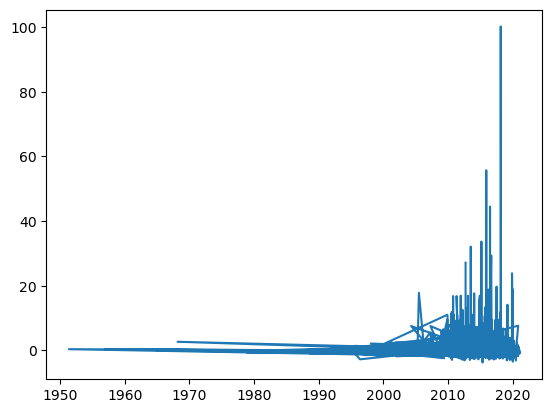

In [15]:
## Severity over time 

sentencing_df['ARREST_DATE'] = pd.to_datetime(sentencing_df['ARREST_DATE'])

plt.plot(sentencing_df["ARREST_DATE"], sentencing_df["sentence_length_zscore"])

In [16]:
## Sentence type (be wary of this)

sentencing_df.groupby("SENTENCE_TYPE")["sentence_length_zscore"].apply(np.mean).sort_values()

SENTENCE_TYPE
Probation                               -0.540041
Probation Terminated Instanter          -0.475841
Jail                                    -0.280403
Inpatient Mental Health Services        -0.258566
Probation Terminated Unsatisfactorily   -0.189491
2nd Chance Probation                    -0.181474
Cook County Boot Camp                   -0.177266
Conditional Discharge                    0.012814
Prison                                   0.024475
Supervision                              0.421073
Conditional Release                      0.486818
Probation Terminated Satisfactorily      1.128597
Death                                    1.610313
Name: sentence_length_zscore, dtype: float64